In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

results_dir = './../data/results/'  # Replace with your directory path
files = [f for f in os.listdir(results_dir) if f.endswith('.csv') and '0.02' in f]
files


['stats_P_Q-DPTO_sample0.02.csv',
 'stats_Hp_Q-AGLOMERADO_sample0.02.csv',
 'stats_Hi_Q-Total_sample0.02.csv',
 'stats_Hp_Q-AGLOSI_sample0.02.csv',
 'stats_P_Q-AGLOSI_sample0.02.csv',
 'stats_PAGLO_Q-AGLOSI_sample0.02.csv',
 'stats_Hi_Q-PROV-AGLOSI_sample0.02.csv',
 'stats_Hp_Q-PROV-AGLOSI_sample0.02.csv',
 'stats_M24_Q-AGLOSI_sample0.02.csv',
 'stats_Hi_Q-PROV_sample0.02.csv',
 'stats_H_Q-AGLOMERADO_sample0.02.csv',
 'stats_Hp_Q-PROV_sample0.02.csv',
 'stats_Hi_Q-AGLOSI_sample0.02.csv',
 'stats_P_Q-PROV_sample0.02.csv',
 'stats_P_Q-Region-AGLOSI_sample0.02.csv',
 'stats_Hi_Q-AGLOMERADO_sample0.02.csv',
 'stats_M24_Q-DPTO_sample0.02.csv',
 'stats_Hi_Q-Region_sample0.02.csv',
 'stats_H_Q-Region-AGLOSI_sample0.02.csv',
 'stats_P_Q-PROV-AGLOSI_sample0.02.csv',
 'stats_P_Q-Total_sample0.02.csv',
 'stats_PAGLO_Q-Region-AGLOSI_sample0.02.csv',
 'stats_M24_Q-P0910_sample0.02.csv',
 'stats_M24_Q-Total_sample0.02.csv',
 'stats_Hp_Q-Region-AGLOSI_sample0.02.csv',
 'stats_Hp_Q-Total_sample0.02.cs

In [2]:
from numpy import logical_and as AND

In [3]:
import matplotlib.pyplot as plt

def plot_time_series(df, observable, sintetico, base_str=None, grouper=None):
    """
    Plot the specified time series based on given parameters.
    
    Parameters:
    - df: DataFrame containing the data.
    - observable: The observable to be plotted.
    - sintetico: The sintetico value for the observable.
    - base_str: (Optional) The base string for the data.
    - grouper: (Optional) The grouper columns to filter by.
    """
    subset = df[(df['observable'] == observable) & (df['sintetico'] == sintetico)]
    
    if base_str:
        subset = subset[subset['base'] == base_str]
    
    if grouper:
        for group_values, group_subset in subset.groupby(grouper):
            mask = AND.reduce([(subset[col] == val) for col, val in zip(grouper, group_values)])
            subset = subset[mask]
    
    # Specific plot rules
    if observable in ["CBA", "CBT", "CB_EQUIV"]:
        if sintetico in ["mean", "median"]:
            linestyle = '--' if sintetico == 'mean' else '-'
            plt.plot(subset['Q'], subset['valor'], linestyle=linestyle, label=sintetico)

    # Add rules for other observables and sinteticos as needed...

    plt.title(f"{observable} - {sintetico}")
    plt.legend()
    plt.show()


In [4]:
# df, 
# observable, sintetico, base_str, grouper

In [5]:

# # For each file in the directory...
# for file in files[:4]:
#     print('Processing: ', file)
#     path = os.path.join(results_dir, file)
#     df = pd.read_csv(path)
    
#     # Convert the 'Q' column to datetime and sort by it
#     df['Q'] = pd.to_datetime(df['Q'])
#     df = df.sort_values('Q')

#     # Extracting observable and grouper from the filename
#     base_str = file.split("_")[1]
#     grouper = file.split("_")[2].split('-')  # Split on hyphen to get individual groupers
#     grouper.remove('Q')  # Remove 'Q' since it's constant

#     # If there are too many groups, skip the plot
#     unique_groups = df.groupby(grouper).ngroups
#     if unique_groups > 25:
#         print(f"Skipping {base_str} for {grouper} due to too many groups.")
#         continue

#     # Create a set of unique (observable, sintetico) pairs
#     unique_pairs = {(row['observable'], row['sintetico']) for _, row in df.iterrows()}
    
#     # Iterate over the unique pairs
#     for observable, sintetico in unique_pairs:
#         plot_time_series(df, observable, sintetico, base_str, grouper)


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# pd.read_csv('./../data/results/stats_H_Q-AGLOMERADO_sample0.02.csv')

Processing:  stats_P_Q-Region_sample0.02.csv


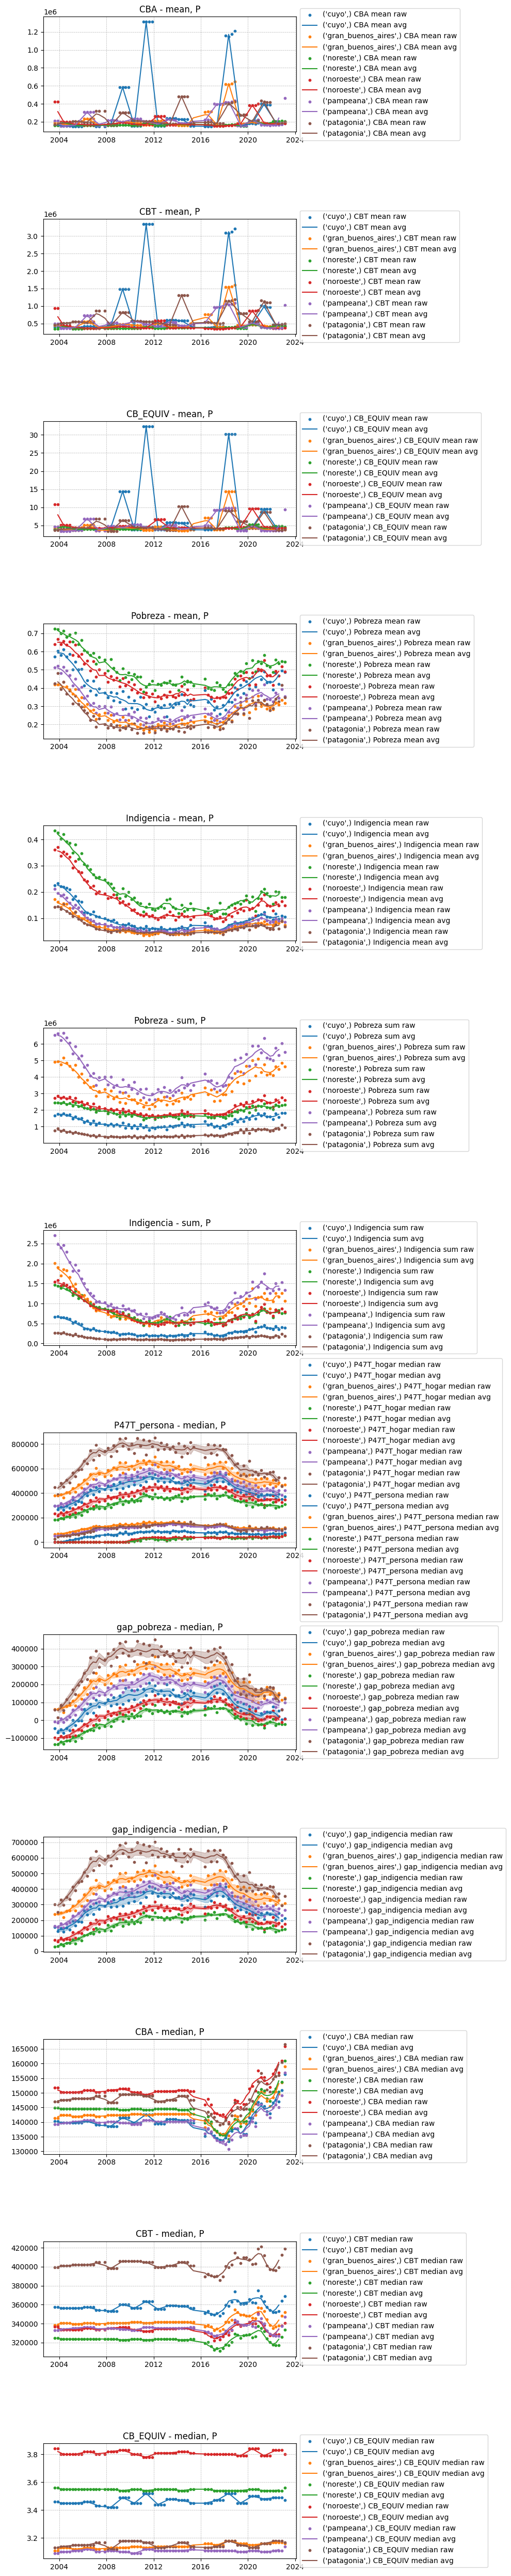

In [10]:


# For each file in the directory...
# for file in files[40:]:
for file in ['stats_P_Q-Region_sample0.02.csv']:
    print('Processing: ', file)
    path = os.path.join(results_dir, file)
    df = pd.read_csv(path)
    
    # Convert the 'Q' column to datetime and sort by it
    df['Q'] = pd.to_datetime(df['Q'])
    df = df.sort_values('Q')

    # Extracting observable and grouper from the filename
    base_str = file.split("_")[1]
    grouper = file.split("_")[2].split('-')  # Split on hyphen to get individual groupers

    # If 'Q' is in grouper, remove it since it's constant and won't vary within a file
    grouper.remove('Q')

    # try:
    # If there are too many groups, skip the plot
    # Count the number of unique combinations for all groupers
    unique_groups = df.groupby(grouper).ngroups
    if unique_groups > 25:
        print(f"Skipping {base_str} for {grouper} due to too many groups.")
        continue

    color_map = {}
    unique_group_combinations = list(df.groupby(grouper).groups.keys())  # Get the actual group values
    colors = plt.cm.tab10.colors  # Using a colormap that provides a set of distinct colors

    for idx, group in enumerate(unique_group_combinations):
        color_map[group] = colors[idx % len(colors)]

    # Create a set of unique (observable, sintetico) pairs
    unique_pairs = {(row['observable'], row['sintetico']) for _, row in df.iterrows()}

    # Create a figure with subplots
    fig, axs = plt.subplots(13, 1, figsize=(10, 50))  # Adjusted for 9 subplots

    # Iterate over the unique pairs
    for observable, sintetico in unique_pairs:


        # Decide which axis to plot on
        if observable == "CBA" and sintetico in ["mean"]:
            ax = axs[0]
        elif observable == "CBT" and sintetico in ["mean"]:
            ax = axs[1]
        elif observable == "CB_EQUIV" and sintetico in ["mean"]:
            ax = axs[2]
        elif observable == "Pobreza" and sintetico == "mean":
            ax = axs[3]
        elif observable == "Indigencia" and sintetico == "mean":
            ax = axs[4]
        elif observable == "Pobreza" and sintetico == "sum":
            ax = axs[5]
        elif observable == "Indigencia" and sintetico == "sum":
            ax = axs[6]
        elif observable in "P47T_hogar" and sintetico == "median":
            ax = axs[7]
        elif observable in "P47T_persona" and sintetico == "median":
            ax = axs[7]
        elif observable == "gap_pobreza" and sintetico == "median":
            ax = axs[8]
        elif observable == "gap_indigencia" and sintetico == "median":
            ax = axs[9]
        elif observable == "CBA" and sintetico in ["median"]:
            ax = axs[10]
        elif observable == "CBT" and sintetico in ["median"]:
            ax = axs[11]
        elif observable == "CB_EQUIV" and sintetico in ["median"]:
            ax = axs[12]
        else:
            continue

        subset = df[(df['observable'] == observable) & (df['sintetico'] == sintetico)]




        for group_values, group_subset in subset.groupby(grouper):

            # Convert single-element tuples to their only element
            key = group_values[0] if isinstance(group_values, tuple) and len(group_values) == 1 else group_values
            group_color = color_map[key]



            mask = AND.reduce([(subset[col] == val) for col, val in zip(grouper, group_values)])
            group_subset = subset[mask]

            # Scatter plot for raw data
            ax.scatter(group_subset['Q'], group_subset['valor'], color=group_color, s=10, label=f"{group_values} {observable} {sintetico} raw")

            # 4-point window average
            group_subset['moving_avg'] = group_subset['valor'].rolling(window=4).mean().shift(-2)
            ax.plot(group_subset['Q'], group_subset['moving_avg'], color=group_color, label=f"{group_values} {observable} {sintetico} avg")

            # Filling the area between 25th and 75th percentiles for specific observables
            if observable in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
                group_subset['q25'] = group_subset['valor'].rolling(window=4).quantile(0.25).shift(-2)
                group_subset['q75'] = group_subset['valor'].rolling(window=4).quantile(0.75).shift(-2)
                ax.fill_between(group_subset['Q'], group_subset['q25'], group_subset['q75'], color=group_color, alpha=0.3)

            ax.set_title(f"{observable} - {sintetico}, {base_str}")

            # Add grid
            ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Place the legend to the right of the plot
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()



        # ## Plot P47T_hogar (if available) with a line for median, filled area for 25 to 75% and a dashed line for mean
        # ## Plot P47T_persona (if available) with a line for median, filled area for 25 to 75% and a dashed line for mean
        # ## Plot gap_indigencia with a line for median, filled area for 25 to 75% and a dashed line for mean
        # ## Plot gap_pobreza with a line for median, filled area for 25 to 75% and a dashed line for mean


    # except:


In [ ]:
xx

NameError: name 'xx' is not defined

In [ ]:
# For each file in the directory...
for file in [files[1]]:
    path = os.path.join(results_dir, file)
    df = pd.read_csv(path)
    
    # Convert the 'Q' column to datetime and sort by it
    df['Q'] = pd.to_datetime(df['Q'])
    df = df.sort_values('Q')

In [ ]:
df.observable.unique()

array(['CBA', 'gap_indigencia', 'gap_pobreza', 'Total', 'Pobreza',
       'P47T_hogar', 'CBT', 'CB_EQUIV', 'Indigencia'], dtype=object)

In [ ]:
df[(df['observable'] == 'P47T_persona') & (df['sintetico'] == 'mean')]

,observable,sintetico,base,Q,timestamp,PROV,valor,frac


In [ ]:
subset

,observable,sintetico,base,Q,timestamp,PROV,valor,frac
46230,CBT,mean,P,2003-08-15,2023-10-27 00:24:22.452805,90,382890.0,0.01
35814,CBT,mean,P,2003-08-15,2023-10-27 00:24:22.452805,70,394800.0,0.01
25370,CBT,mean,P,2003-08-15,2023-10-27 00:24:22.452805,50,408360.0,0.01
21198,CBT,mean,P,2003-08-15,2023-10-27 00:24:22.452805,42,392300.0,0.01
4510,CBT,mean,P,2003-08-15,2023-10-27 00:24:22.452805,10,340370.0,0.01
...,...,...,...,...,...,...,...,...
14901,CBT,mean,P,2023-02-15,2023-10-27 13:25:08.477770,30,674030.0,0.01
35761,CBT,mean,P,2023-02-15,2023-10-27 13:25:08.477770,70,424550.0,0.01
6557,CBT,mean,P,2023-02-15,2023-10-27 13:25:08.477770,14,365290.0,0.01
599,CBT,mean,P,2023-02-15,2023-10-27 13:25:08.477770,90,367060.0,0.01


In [ ]:
df

,observable,sintetico,base,Q,timestamp,PROV,valor,frac
0,CBA,mean,H,2003-08-15,2023-10-27 00:27:21.533402,2,92330.0,0.01
28156,gap_indigencia,mean,H,2003-08-15,2023-10-27 00:27:21.533402,70,202100.0,0.01
28157,gap_indigencia,median,H,2003-08-15,2023-10-27 00:27:21.533402,70,143050.0,0.01
28158,gap_pobreza,mean,H,2003-08-15,2023-10-27 00:27:21.533402,70,13600.0,0.01
28159,gap_pobreza,median,H,2003-08-15,2023-10-27 00:27:21.533402,70,-8680.0,0.01
...,...,...,...,...,...,...,...,...
513,gap_pobreza,median,H,2023-02-15,2023-10-27 13:31:32.588932,34,22060.0,0.01
511,gap_pobreza,median,H,2023-02-15,2023-10-27 13:31:32.588932,26,181850.0,0.01
509,gap_pobreza,median,H,2023-02-15,2023-10-27 13:31:32.588932,18,42030.0,0.01
469,CBT,median,H,2023-02-15,2023-10-27 13:31:32.588932,50,277570.0,0.01
